In [ ]:
# -------------------------BASIC TASKS------------------------------
# ------------------------------------------------------------------

In [14]:
!pip install matplotlib scikit-learn seaborn numpy pandas tensorflow flask

BASIC TASK 1

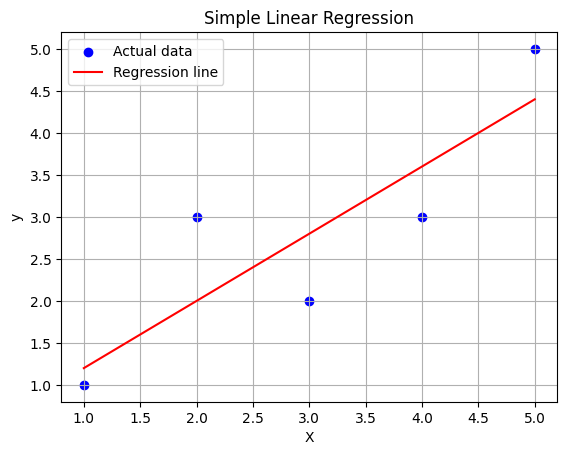

Intercept: 0.3999999999999999
Coefficient: 0.7999999999999999
Prediction for input 6: 5.199999999999999


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample dataset
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Features
y = np.array([1, 3, 2, 3, 5])  # Target values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the data and regression line
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Print model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Predict for a new value
new_value = np.array([[6]])
predicted = model.predict(new_value)
print(f"Prediction for input 6: {predicted[0]}")


BASIC TASK 2

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


 BASIC TASK 3

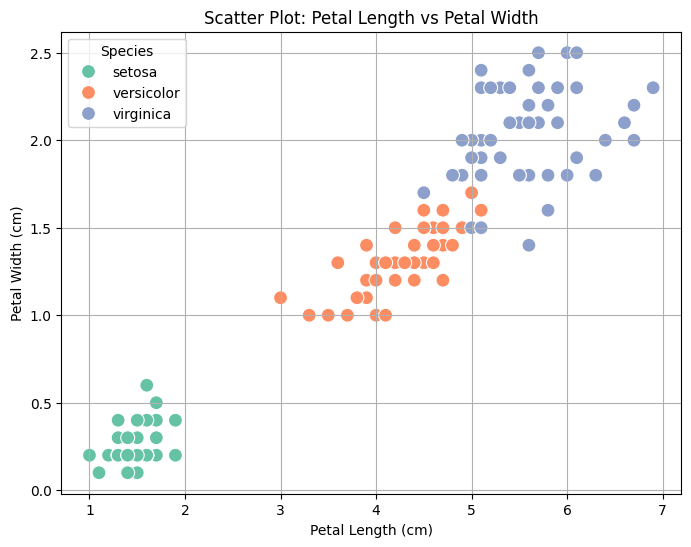

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert to a DataFrame for easy plotting
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].apply(lambda x: iris.target_names[x])

# Scatter plot: Petal Length vs Petal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species', palette='Set2', s=100)
plt.title('Scatter Plot: Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid(True)
plt.legend(title='Species')
plt.show()


In [ ]:
# -------------------------INTERMEDIATE TASKS------------------------------
# -------------------------------------------------------------------------

INTERMEDIATE TASK 1

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Initialize classifier
clf = DecisionTreeClassifier(random_state=42)

# Define 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = ['accuracy', 'f1_macro']

# Perform cross-validation
scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

# Print scores
print("Cross-validation results (5 folds):")
print(f"Accuracy (mean ± std): {np.mean(scores['test_accuracy']):.3f} ± {np.std(scores['test_accuracy']):.3f}")
print(f"F1-score (macro) (mean ± std): {np.mean(scores['test_f1_macro']):.3f} ± {np.std(scores['test_f1_macro']):.3f}")


Cross-validation results (5 folds):
Accuracy (mean ± std): 0.953 ± 0.034
F1-score (macro) (mean ± std): 0.953 ± 0.034


INTERMEDIATE TASK 2


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sample dataset
data = {
    'age': [25, 30, np.nan, 35, 40],
    'salary': [50000, 60000, 52000, np.nan, 80000],
    'gender': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'purchased': [0, 1, 0, 1, 1]
}

df = pd.DataFrame(data)

# Split features and target
X = df.drop('purchased', axis=1)
y = df['purchased']

# Identify columns
numeric_features = ['age', 'salary']
categorical_features = ['gender']

# Pipelines for preprocessing
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),         # Fill missing values with mean
    ('scaler', StandardScaler())                         # Normalize features
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first'))             # One-hot encode gender (drop one to avoid multicollinearity)
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Show results
print("Processed feature array:\n", X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed)
print("\nTrain set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Processed feature array:
 [[-1.5        -0.98950981  1.        ]
 [-0.5        -0.04711951  0.        ]
 [ 0.         -0.80103175  0.        ]
 [ 0.5         0.          1.        ]
 [ 1.5         1.83766107  0.        ]]

Train set shape: (4, 3)
Test set shape: (1, 3)


INTERMEDIATE TASK 3

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# -------------------------EXPERT TASKS------------------------------
# ------------------------------------------------------------------

EXPERT TASK 1

In [11]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target
y = to_categorical(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes in Iris dataset
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6307 - loss: 1.1802
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7156 - loss: 0.9616  
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7047 - loss: 0.8882 
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6909 - loss: 0.8753 
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7038 - loss: 0.7440 
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7249 - loss: 0.7106 
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7802 - loss: 0.6019 
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7934 - loss: 0.5609 
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7015 - loss: 0.5446 
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7950 - loss: 0.5033 
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7431 - loss: 0.5019 
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

EXPERT TASK 2


In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5],
}

# Apply GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Show classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
Best Cross-Validation Accuracy: 0.95

Classification Report on Test Set:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



EXPERT TASK 3

In [13]:
# train_and_save_model.py
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import joblib

# Load and train model
iris = load_iris()
X, y = iris.data, iris.target
model = DecisionTreeClassifier()
model.fit(X, y)

# Save model
joblib.dump(model, 'iris_model.pkl')
print("Model saved as iris_model.pkl")


Model saved as iris_model.pkl


In [17]:
# Download model file to your computer (for GCP deployment)
from google.colab import files
files.download('iris_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# app.py
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Load the model
model = joblib.load('iris_model.pkl')

@app.route('/')
def home():
    return "Welcome to the Iris Prediction API!"

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from POST request
    data = request.get_json()
    features = np.array(data['features']).reshape(1, -1)

    # Make prediction
    prediction = model.predict(features)

    # Return the prediction
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
